In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# one hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

from pygam import LinearGAM, s, f, te

# ignore warning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('ignore')

# MD

In [39]:
df = pd.read_csv('./regression_df_input/MD_model_df.csv')
#df_new = df[df.columns[:6]]
df_new = df.copy()
df_new['date'] = df_new['date'].astype(str)
df_new.head(5)

,company_name,Group,ticker,file_name,date,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,WA_sentiment,Close,D-1,D+1,D-2,D+2,D-3,D+3,D-5,D+5,D-10,D+10,D-15,D+15,D-16,D+16,D-17,D+17,D-18,D+18,D-19,D+19,D-20,D+20,D-21,D+21,D-22,D+22,D-23,D+23,D-24,D+24,D-25,D+25,D-26,D+26,D-27,D+27,D-28,D+28,D-29,D+29,D-30,D+30,D-40,D+40,D-50,D+50,D-60,D+60
0,Admiral Group,Motor/Personal,ADM.L,20110302_Admiral_Group_PLC-_Earnings_Call_2011...,2011-03-02,0.000940,0.012294,0.398791,0.008481,0.009419,0.056247,0.005848,0.000273,0.295048,0.212659,0.000392,1655.0,-0.031030,0.013897,-0.020130,0.015106,-0.003612,-0.000604,-0.011350,-0.003021,-0.029326,-0.060423,-0.030463,-0.045317,-0.034422,-0.046526,-0.037231,-0.047734,-0.028186,-0.044713,-0.024175,-0.060423,-0.045009,-0.057402,-0.032164,-0.061027,0.007304,-0.026586,0.010996,-0.026586,-0.003012,-0.028399,-0.001809,-0.021752,0.010996,-0.031420,0.003639,-0.025378,-0.000604,-0.025378,0.020345,-0.028399,0.022236,-0.015710,0.057508,0.022356,0.067054,0.059819,0.030511,0.041088
1,Admiral Group,Motor/Personal,ADM.L,20110824_Admiral_Group_PLC-_Earnings_Call_2011...,2011-08-24,0.005148,0.002558,0.314133,0.008527,0.037732,0.054996,0.000857,0.000344,0.266681,0.309022,0.000765,1353.0,-0.118567,-0.054693,-0.110454,-0.025868,-0.094983,-0.005913,-0.125969,0.011086,-0.031496,0.008130,-0.117417,-0.028825,-0.099800,-0.041390,-0.119141,-0.056911,-0.126533,-0.048041,-0.127097,-0.070214,-0.111038,-0.090909,-0.131579,-0.060606,-0.133803,-0.014782,-0.151192,0.021434,-0.147985,-0.025129,-0.128783,-0.035477,-0.127097,-0.066519,-0.118567,-0.070214,-0.146910,-0.093126,-0.143129,-0.066519,-0.125404,-0.069475,-0.178007,-0.108647,-0.208309,-0.124169,-0.205520,-0.390244
2,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.002408,0.003127,0.001132,0.088902,0.002066,0.037772,0.001742,0.000700,0.296897,0.565255,-0.000433,887.5,-0.256077,-0.076056,-0.247881,-0.053521,-0.251686,-0.061972,-0.234914,-0.098028,-0.276691,-0.025352,-0.275510,0.039437,-0.285427,0.027606,-0.296751,0.027042,-0.297308,0.045070,-0.284274,0.003380,-0.283118,-0.036056,-0.279041,-0.055211,-0.287721,-0.037183,-0.283118,-0.070986,-0.295075,-0.067042,-0.297308,-0.113239,-0.276691,-0.098028,-0.294515,-0.096338,-0.297308,-0.098592,-0.319923,-0.061408,-0.327142,-0.077183,-0.303375,-0.069859,-0.349817,0.018028,-0.420314,0.125070
3,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.004044,0.001966,0.398870,0.017938,0.009261,0.022735,0.025120,0.008021,0.252457,0.259588,0.000336,887.5,-0.256077,-0.076056,-0.247881,-0.053521,-0.251686,-0.061972,-0.234914,-0.098028,-0.276691,-0.025352,-0.275510,0.039437,-0.285427,0.027606,-0.296751,0.027042,-0.297308,0.045070,-0.284274,0.003380,-0.283118,-0.036056,-0.279041,-0.055211,-0.287721,-0.037183,-0.283118,-0.070986,-0.295075,-0.067042,-0.297308,-0.113239,-0.276691,-0.098028,-0.294515,-0.096338,-0.297308,-0.098592,-0.319923,-0.061408,-0.327142,-0.077183,-0.303375,-0.069859,-0.349817,0.018028,-0.420314,0.125070
4,Admiral Group,Motor/Personal,ADM.L,20120307_Admiral_Group_PLC-_Earnings_Call_2012...,2012-03-07,0.019652,0.017997,0.460937,0.081705,0.024005,0.007314,0.001035,0.000415,0.162040,0.224901,0.001669,1144.0,0.100000,0.015734,0.095785,0.012238,0.080264,0.022727,0.062210,0.036713,0.103182,0.020979,0.179990,0.014860,0.181818,0.009615,0.181818,0.037587,0.186722,0.039336,0.161421,0.055070,0.186107,0.039336,0.175745,0.055070,0.145719,0.044580,0.102119,0.051573,0.189189,0.063811,0.226152,0.034091,0.215728,0.026224,0.278927,0.045455,0.242803,0.056818,0.243478,0.056818,0.266888,0.070804,0.354648,0.013986,0.375827,-0.048951,0.338795,-0.055944


In [18]:
day_list = df_new.iloc[:,17:66].columns.to_list()

In [19]:
def same_direction(df, day_type):
    df_same = df[((df['WA_sentiment']<0) & (df[day_type]<0)) | ((df['WA_sentiment']>0) & (df[day_type]>0))]
    return df_same

In [20]:
for day in day_list:
    print(f"------------- {day}")
    df_run = same_direction(df_new, day)
    df_run['group'] = labelencoder.fit_transform(df_run['Group'])

    X = df_run[['WA_sentiment','group']].values.tolist()
    Y = df_run[day]

    gam = LinearGAM(s(0)+f(1)).fit(X, Y)
    print(gam.summary())
    print("                      ")

------------- D-1
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2605
Link Function:                     IdentityLink Log Likelihood:                               -782960.7108
Number of Samples:                          966 AIC:                                          1565961.9426
                                                AICc:                                         1565962.8545
                                                GCV:                                                0.0006
                                                Scale:                                              0.0006
                                                Pseudo R-Squared:                                   0.1649
Feature Function   

In [24]:
X_col = ['WA_sentiment']
df_dummies = pd.get_dummies(df_new,prefix=['Group'], columns = ['Group'], drop_first=False)
dummies_category = df_dummies.columns[-10:]
X_col.extend(dummies_category)
print(X_col)

day_list = df_new.columns[17:].tolist()
print(day_list)

['WA_sentiment', 'Group_European (Re)Insurers', 'Group_Global Commercial', 'Group_Japanese & Pacific', 'Group_LN Equity', 'Group_Life Groups & Retail Life', 'Group_London Market', 'Group_Motor/Personal', 'Group_Other insurers', 'Group_Run-off', 'Group_US - Specialty/P&C/Reinsurance']
['D-1', 'D+1', 'D-2', 'D+2', 'D-3', 'D+3', 'D-5', 'D+5', 'D-10', 'D+10', 'D-15', 'D+15', 'D-16', 'D+16', 'D-17', 'D+17', 'D-18', 'D+18', 'D-19', 'D+19', 'D-20', 'D+20', 'D-21', 'D+21', 'D-22', 'D+22', 'D-23', 'D+23', 'D-24', 'D+24', 'D-25', 'D+25', 'D-26', 'D+26', 'D-27', 'D+27', 'D-28', 'D+28', 'D-29', 'D+29', 'D-30', 'D+30', 'D-40', 'D+40', 'D-50', 'D+50', 'D-60', 'D+60']


In [25]:
formula = 's(WA_sentiment) '
for cat in dummies_category:
    new_var = f'+ s({cat}) + te(WA_sentiment,{cat})'
    formula += new_var
print(formula)

for day in day_list:
    print(f"------------- {day}")
    df_run = same_direction(df_dummies, day)
    # df_run['group'] = labelencoder.fit_transform(df_run['Group'])

    X = df_run[X_col].values.tolist()
    Y = df_run[day]

    gam = LinearGAM(s(0) + s(1) + te(0,1)+ s(2) + te(0,2)+ s(3) + te(0,3)+ s(4) + te(0,4)
                    + s(5) + te(0,5)+ s(6) + te(0,6)+ s(7) + te(0,7)+ s(8) + te(0,8)
                    + s(9) + te(0,9)+ s(10) + te(0,10)).fit(X, Y)
    print(gam.summary())
    print("                      ")

s(WA_sentiment) + s(Group_European (Re)Insurers) + te(WA_sentiment,Group_European (Re)Insurers)+ s(Group_Global Commercial) + te(WA_sentiment,Group_Global Commercial)+ s(Group_Japanese & Pacific) + te(WA_sentiment,Group_Japanese & Pacific)+ s(Group_LN Equity) + te(WA_sentiment,Group_LN Equity)+ s(Group_Life Groups & Retail Life) + te(WA_sentiment,Group_Life Groups & Retail Life)+ s(Group_London Market) + te(WA_sentiment,Group_London Market)+ s(Group_Motor/Personal) + te(WA_sentiment,Group_Motor/Personal)+ s(Group_Other insurers) + te(WA_sentiment,Group_Other insurers)+ s(Group_Run-off) + te(WA_sentiment,Group_Run-off)+ s(Group_US - Specialty/P&C/Reinsurance) + te(WA_sentiment,Group_US - Specialty/P&C/Reinsurance)
------------- D-1
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDi

In [82]:
# formula = 's(0) '
# for i in range(len(dummies_category)):
#     new_var = f'+ s({i+1}) + te(0,{i+1})'
#     formula += new_var
# formula

's(0) + s(1) + te(0,1)+ s(2) + te(0,2)+ s(3) + te(0,3)+ s(4) + te(0,4)+ s(5) + te(0,5)+ s(6) + te(0,6)+ s(7) + te(0,7)+ s(8) + te(0,8)+ s(9) + te(0,9)+ s(10) + te(0,10)'

# QA

In [46]:
df = pd.read_csv('./regression_df_input/QA_model_df.csv')
pd.set_option('display.max_columns', None)
#df_new = df[df.columns[:6]]
df_new = df.copy()
df_new['date'] = df_new['date'].astype(str)
df_new.head(5)

,company_name,Group,ticker,file_name,date,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,WA_sentiment,Close,D-1,D+1,D-2,D+2,D-3,D+3,D-5,D+5,D-10,D+10,D-15,D+15
0,Admiral Group,Motor/Personal,ADM.L,20110302_Admiral_Group_PLC-_Earnings_Call_2011...,2011-03-02,0.031949,0.071316,0.001887,0.044913,0.173669,0.000872,0.354589,0.062881,0.107171,0.067565,0.000753,0.027564,0.005498,0.049375,0.000826,1655.0,-0.031030,0.013897,-0.020130,0.015106,-0.003612,-0.000604,-0.011350,-0.003021,-0.029326,-0.060423,-0.030463,-0.045317
1,Admiral Group,Motor/Personal,ADM.L,20110824_Admiral_Group_PLC-_Earnings_Call_2011...,2011-08-24,0.036994,0.094859,0.000492,0.092420,0.268424,0.033912,0.102734,0.103290,0.000900,0.066103,0.004690,0.005994,0.056138,0.133051,0.000971,1353.0,-0.118567,-0.054693,-0.110454,-0.025868,-0.094983,-0.005913,-0.125969,0.011086,-0.031496,0.008130,-0.117417,-0.028825
2,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.002439,0.032775,0.002953,0.001697,0.312097,0.030638,0.151864,0.124540,0.121835,0.129073,0.023103,0.030216,0.034974,0.001796,0.001851,887.5,-0.256077,-0.076056,-0.247881,-0.053521,-0.251686,-0.061972,-0.234914,-0.098028,-0.276691,-0.025352,-0.275510,0.039437
3,Admiral Group,Motor/Personal,ADM.L,20120307_Admiral_Group_PLC-_Earnings_Call_2012...,2012-03-07,0.000834,0.068388,0.001439,0.004353,0.163258,0.000731,0.430827,0.004588,0.038603,0.110456,0.023270,0.031050,0.068767,0.053438,0.001353,1144.0,0.100000,0.015734,0.095785,0.012238,0.080264,0.022727,0.062210,0.036713,0.103182,0.020979,0.179990,0.014860
4,Admiral Group,Motor/Personal,ADM.L,20130306_Admiral_Group_PLC-_Earnings_Call_2013...,2013-03-06,0.022024,0.012450,0.735922,0.015318,0.026735,0.019312,0.018163,0.021524,0.023038,0.027322,0.016677,0.022849,0.022453,0.016212,-0.046780,1334.0,0.052881,0.016492,0.045455,0.014243,0.069767,0.018741,0.066347,0.006747,0.033308,-0.001499,0.044636,-0.008996


In [47]:
day_list = df_new.iloc[:,21:].columns.to_list()
day_list

['D-1',
 'D+1',
 'D-2',
 'D+2',
 'D-3',
 'D+3',
 'D-5',
 'D+5',
 'D-10',
 'D+10',
 'D-15',
 'D+15']

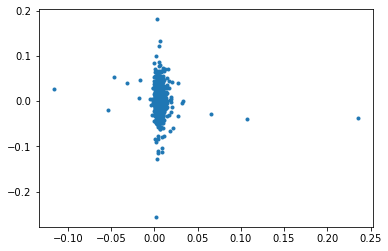

                            OLS Regression Results                            
Dep. Variable:                    D-1   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.520
Date:                Wed, 24 Aug 2022   Prob (F-statistic):             0.0610
Time:                        22:46:31   Log-Likelihood:                 1380.7
No. Observations:                 691   AIC:                            -2757.
Df Residuals:                     689   BIC:                            -2748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.001      3.415      0.0

In [52]:
df_run = same_direction(df_new, day)
# plot the df_run["WA_sentiment"] and df_run["D-1"]
plt.plot(df_run["WA_sentiment"], df_run["D-1"], '.')
plt.show()


# run the OLS regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = df_run[['WA_sentiment']].values.tolist()
X = sm.add_constant(X)
Y = df_run['D-1']


model = sm.OLS(Y, X).fit()
print(model.summary())

In [37]:
for day in day_list:
    print(f"------------- {day}")
    df_run = same_direction(df_new, day)
    df_run['group'] = labelencoder.fit_transform(df_run['Group'])

    X = df_run[['WA_sentiment','group']].values.tolist()
    Y = df_run[day]

    gam = LinearGAM(s(0)+f(1)).fit(X, Y)
    print(gam.summary())
    print("                      ")

------------- D-1
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     16.0861
Link Function:                     IdentityLink Log Likelihood:                                -635243.443
Number of Samples:                          716 AIC:                                          1270521.0581
                                                AICc:                                         1270521.9436
                                                GCV:                                                0.0006
                                                Scale:                                              0.0005
                                                Pseudo R-Squared:                                   0.0984
Feature Function   

In [34]:
dummies_category = df_dummies.columns[-10:]
len(dummies_category)

10

In [35]:
X_col = ['WA_sentiment']
df_dummies = pd.get_dummies(df_new,prefix=['Group'], columns = ['Group'], drop_first=False)
dummies_category = df_dummies.columns[-10:]
X_col.extend(dummies_category)
print(X_col)
print(day_list)

['WA_sentiment', 'Group_European (Re)Insurers', 'Group_Global Commercial', 'Group_Japanese & Pacific', 'Group_LN Equity', 'Group_Life Groups & Retail Life', 'Group_London Market', 'Group_Motor/Personal', 'Group_Other insurers', 'Group_Run-off', 'Group_US - Specialty/P&C/Reinsurance']
['D-1', 'D+1', 'D-2', 'D+2', 'D-3', 'D+3', 'D-5', 'D+5', 'D-10', 'D+10', 'D-15', 'D+15']


In [36]:
formula = 's(WA_sentiment) '
for cat in dummies_category:
    new_var = f'+ s({cat}) + te(WA_sentiment,{cat})'
    formula += new_var
print(formula)

for day in day_list:
    print(f"------------- {day}")
    df_run = same_direction(df_dummies, day)
    # df_run['group'] = labelencoder.fit_transform(df_run['Group'])

    X = df_run[X_col].values.tolist()
    Y = df_run[day]

    gam = LinearGAM(s(0) + s(1) + te(0,1)+ s(2) + te(0,2)+ s(3) + te(0,3)+ s(4) + te(0,4)
                    + s(5) + te(0,5)+ s(6) + te(0,6)+ s(7) + te(0,7)+ s(8) + te(0,8)
                    + s(9) + te(0,9)+ s(10) + te(0,10)).fit(X, Y)
    print(gam.summary())
    print("                      ")

s(WA_sentiment) + s(Group_European (Re)Insurers) + te(WA_sentiment,Group_European (Re)Insurers)+ s(Group_Global Commercial) + te(WA_sentiment,Group_Global Commercial)+ s(Group_Japanese & Pacific) + te(WA_sentiment,Group_Japanese & Pacific)+ s(Group_LN Equity) + te(WA_sentiment,Group_LN Equity)+ s(Group_Life Groups & Retail Life) + te(WA_sentiment,Group_Life Groups & Retail Life)+ s(Group_London Market) + te(WA_sentiment,Group_London Market)+ s(Group_Motor/Personal) + te(WA_sentiment,Group_Motor/Personal)+ s(Group_Other insurers) + te(WA_sentiment,Group_Other insurers)+ s(Group_Run-off) + te(WA_sentiment,Group_Run-off)+ s(Group_US - Specialty/P&C/Reinsurance) + te(WA_sentiment,Group_US - Specialty/P&C/Reinsurance)
------------- D-1
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDi